In [7]:
%pip install zss
%pip install lxml
%pip install pandas
%pip install seaborn
%pip install -U sentence-transformers
%pip install gensim

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.3/23.3 MB 56.0 MB/s eta 0:00:00m eta 0:00:010:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 1.9 MB/s eta 0:00:00
  Created wheel for gensim: filename=gensim-4.3.2-cp312-cp312-macosx_12_0_arm64.whl size=23951710 sha256=12b6f89ff62cbd32f0f571d468100326c011be4fb5594a29acb9fc832ede6a2f
  Stored in directory: /Users/nathanschiele/Library/Caches/pip/wheels/50/c0/ac/7bb08954bc59d390c848b480a3fc5eec68c14bc77bf334d624
Successfully built gensim

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.0.12/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [54]:
import xml.etree.ElementTree as ET
from zss import simple_distance, distance, Node
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as api
dataset = api.load("text8")

In [28]:

A = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("h"))
            .addkid(Node("c")
                .addkid(Node("l"))))
        .addkid(Node("e"))
    )
B = (
    Node("f")
        .addkid(Node("a")
            .addkid(Node("d"))
            .addkid(Node("c")
                .addkid(Node("b"))))
        .addkid(Node("e"))
    )

In [29]:
print(simple_distance(A, B, return_operations=True))

(2.0, [<Operation Update>, <Operation Update>, <Operation Match>, <Operation Match>, <Operation Match>, <Operation Match>])


In [30]:
tree = ET.parse("data/AT1/ICS2-01.xml")
# with open("data/AT1/ICS2-01.xml", "r") as f:
#     data = f.read()
root = tree.getroot()[0]
print(root.attrib["refinement"])
print(root[0].text)
print(root[1:len(root)])
print(len(root))

disjunctive
Gathering personal data
[<Element 'node' at 0x31ae03ce0>, <Element 'node' at 0x3555986d0>, <Element 'node' at 0x355598900>]
4


In [31]:
def xmlToZSSTree(file):
    tree = ET.parse(file)
    root = tree.getroot()[0]
    ZSSTree = XMLZSSNode(root)
    return ZSSTree
    # attribute = root.attrib["refinement"]
    # label = root[0].text
    # children = root[1:len(root)]
    # for i in children:
    #     print(i[0].text)
    #     print(i.attrib["refinement"])
    


    
    
def XMLZSSNode(node):
    label = node[0].text
    # print(label)
    refinement = node.attrib["refinement"]
    children = []
    if len(node) > 1:
        xml_children = node[1:len(node)]
        for i in xml_children:
            children.append(XMLZSSNode(i))
    return Node(label, children)
    
    

    

<Axes: >

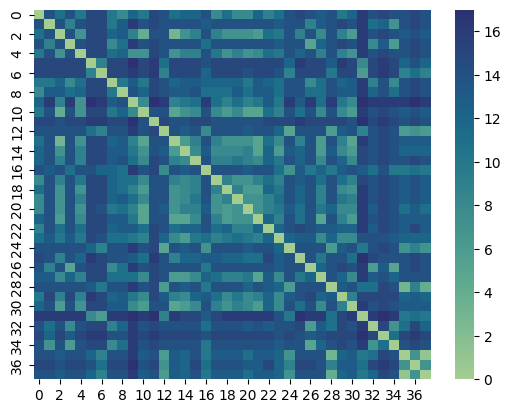

In [32]:


data = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = simple_distance(T1, T2)#, return_operations=True))
        temp.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

sns.heatmap(simple_df, annot=False, cmap="crest")

# print(T1, T2)
# print(simple_distance(T1, T2, return_operations=True))

## Simple Distance

12.339971550497866


<Axes: >

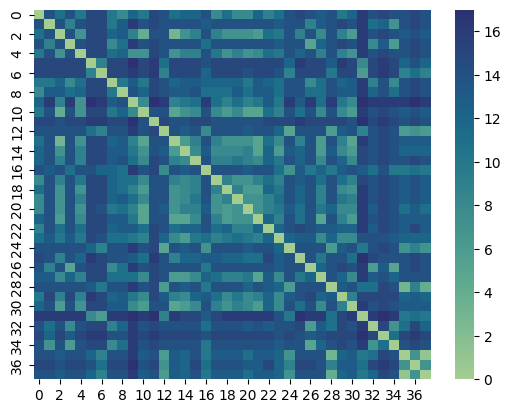

In [33]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    if a == b:
        return 0
    else:
        return 1


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

print(sum(unique)/len(unique))
sns.heatmap(simple_df, annot=False, cmap="crest")

## Structual Only

Nodes can be updated at no cost - so the only cost is with adding and subtracting nodes. Hence this is a comparison of construction.

0.9630156472261735


<Axes: >

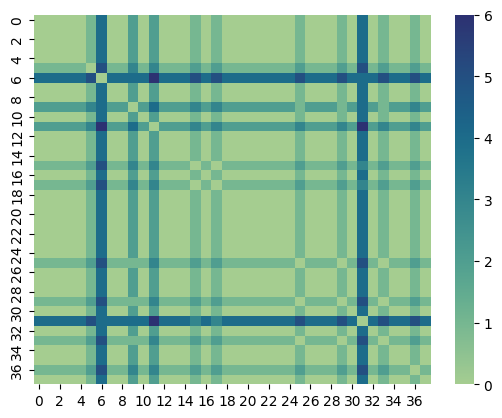

In [34]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    return 0
    if a == b:
        return 0
    else:
        return 1


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

simple_df = pd.DataFrame(data)
# print(simple_df)        

print(sum(unique)/len(unique))
sns.heatmap(simple_df, annot=False, cmap="crest")

0.9630156472261735


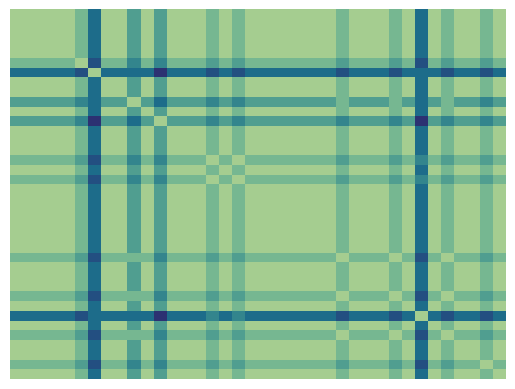

In [61]:
def insert(a):
    return 1
def remove(a):
    return 1
def update(a, b):
    return 0


data = []
unique = []
for i in range(1, 39):
    temp = []
    for j in range(1, 39):
        if i < 10:
            i = "0" + str(i)
        if j < 10:
            j = "0" + str(j)
        T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
        T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
        dist = distance(T1, T2, Node.get_children, insert, remove, update)
        temp.append(dist)
        if int(i) < int(j):
            unique.append(dist)
        # print(i, j, dist)
        i = int(i)
        j = int(j)
    data.append(temp)

print(sum(unique)/len(unique))
simple_df = pd.DataFrame(data)
# print(simple_df)        


ax = sns.heatmap(simple_df, annot=False, cmap="crest",  yticklabels=False,  xticklabels=False, cbar=False)
ax.tick_params(left=False, bottom=False)
plt.savefig("img/test.png")

In [15]:
data = [i for i in dataset]
def tagged_document(list_of_list_of_words):
   for i, list_of_words in enumerate(list_of_list_of_words):
      yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])
 
training_data = list(tagged_document(data))
model = gensim.models.doc2vec.Doc2Vec(vector_size=40, min_count=2, epochs=30)
 
model.build_vocab(training_data)
model.train(training_data, total_examples=model.corpus_count, epochs=model.epochs)

In [20]:
from math import sqrt, pow, exp
 
def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)
 
def euclidean_distance(x,y):
  """ return euclidean distance between two lists """
 
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

In [25]:
vectors = [model.infer_vector([word for word in sent]).reshape(1,-1) for sent in sentences]

similarity = []
for i in range(len(sentences)):
   row = []
   for j in range(len(sentences)):
        # print(vectors[i])
        row.append(cos_similarity(vectors[i][0],vectors[j][0]))
   similarity.append(row)
print(sentences)
print(similarity)
# create_heatmap(similarity)

['This framework generates embeddings for each input sentence', 'Sentences are passed as a list of string.', 'The quick brown fox jumps over the lazy dog.']
[[1.0, 0.976, 0.987], [0.976, 1.0, 0.942], [0.987, 0.942, 1.0]]


In [132]:
import time

lims = []
lims.extend([round(.9 + .01*i, 4) for i in range(0, 7)])
lims.extend([round(.96 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.97 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.98 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.99 + .001*i, 4) for i in range(0, 10)])
lims.append(1)

def insert(a):
    return 1
def remove(a):
    return 1


lim = .9
def update(a, b):
    vectors = [model.infer_vector([word for word in sent]).reshape(1,-1) for sent in [a.label, b.label]]
    # print(vectors[0])
    sim = cos_similarity(vectors[0][0],vectors[1][0])
    # print(a.label, b.label, sim)
    if sim > lim:
        return 0
    else:
        return 1

all_data3 = []
for k in lims:
    start = time.time()
    # lim = .90 + .01*k
    lim = k
    print(lim)
    data = []
    unique = []
    for i in range(1, 39):
        temp = []
        for j in range(1, 39):
            if i < 10:
                i = "0" + str(i)
            if j < 10:
                j = "0" + str(j)
            T1 = xmlToZSSTree("data/AT1/ICS2-"+str(i)+".xml")
            T2 = xmlToZSSTree("data/AT1/ICS2-"+str(j)+".xml")
            dist = distance(T1, T2, Node.get_children, insert, remove, update)
            temp.append(dist)
            if int(i) < int(j):
                unique.append(dist)
            # print(i, j, dist)
            i = int(i)
            j = int(j)
        data.append(temp)  
    end = time.time()
    print(end - start, sum(unique)/len(unique))
    simple_df = pd.DataFrame(data)
    all_data3.append((lim, simple_df))
    # ax = sns.heatmap(simple_df, annot=False, cmap="crest",  yticklabels=False,  xticklabels=False, cbar=False)
    # ax.tick_params(left=False, bottom=False)
    # plt.savefig("img/sim_dist_heatmaps/lim-"+str(lim)+".png")
with open('48lims', 'wb') as fp:
    pickle.dump(all_data3, fp) 


# sns.heatmap(simple_df, annot=False, cmap="crest")

0.9
432.0116431713104 0.9630156472261735
0.91
425.14459109306335 0.9630156472261735
0.92
425.6235930919647 0.9644381223328592
0.93
424.9640028476715 0.9644381223328592
0.94
436.80220890045166 0.972972972972973
0.95
459.2949318885803 1.0128022759601707
0.96
425.13879108428955 1.1863442389758179
0.96
441.791934967041 1.1820768136557611
0.961
456.68992495536804 1.2147937411095306
0.962
423.58278584480286 1.2830725462304409
0.963
422.9355969429016 1.310099573257468
0.964
426.9965019226074 1.330014224751067
0.965
430.0004029273987 1.399715504978663
0.966
442.2524061203003 1.433854907539118
0.967
424.7546100616455 1.4864864864864864
0.968
425.15252685546875 1.5320056899004268
0.969
424.4945101737976 1.635846372688478
0.97
428.08564805984497 1.7339971550497866
0.971
424.7553050518036 1.768136557610242
0.972
425.61013412475586 1.8776671408250356
0.973
425.355672121048 2.0099573257467993
0.974
425.28690791130066 2.0867709815078235
0.975
426.6996762752533 2.2147937411095304
0.976
425.43948316574

In [70]:
import pickle
with open('lim991-999', 'wb') as fp:
    pickle.dump(all_data, fp)

In [131]:
lims = []
lims.extend([round(.9 + .01*i, 4) for i in range(0, 7)])
lims.extend([round(.96 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.97 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.98 + .001*i, 4) for i in range(0, 10)])
lims.extend([round(.99 + .001*i, 4) for i in range(0, 10)])
lims.append(1)
print(len(lims))

48


In [72]:
with open('lim991-999', 'rb') as fp:
    print(pickle.load(fp))

[(0.991,      0    1    2    3     4    5    6    7    8     9   ...   28   29   30  \
0   8.0  3.0  3.0  4.0   6.0  6.0  6.0  3.0  4.0   7.0  ...  3.0  3.0  5.0   
1   1.0  4.0  2.0  1.0   2.0  2.0  4.0  3.0  2.0   4.0  ...  3.0  3.0  1.0   
2   4.0  3.0  8.0  6.0   8.0  4.0  4.0  7.0  3.0   6.0  ...  6.0  4.0  4.0   
3   5.0  2.0  5.0  6.0   6.0  4.0  6.0  3.0  3.0   5.0  ...  5.0  3.0  1.0   
4   6.0  1.0  4.0  1.0  10.0  5.0  7.0  7.0  4.0   7.0  ...  7.0  8.0  5.0   
5   5.0  2.0  4.0  4.0   3.0  7.0  7.0  3.0  4.0   5.0  ...  5.0  5.0  2.0   
6   5.0  5.0  6.0  4.0   5.0  7.0  6.0  5.0  5.0   6.0  ...  6.0  8.0  6.0   
7   4.0  0.0  8.0  5.0   8.0  5.0  5.0  6.0  2.0   7.0  ...  4.0  5.0  3.0   
8   5.0  1.0  3.0  3.0   1.0  4.0  6.0  5.0  6.0   8.0  ...  7.0  3.0  4.0   
9   5.0  2.0  6.0  6.0   8.0  3.0  7.0  6.0  4.0  10.0  ...  6.0  6.0  4.0   
10  5.0  2.0  5.0  4.0   6.0  5.0  7.0  7.0  4.0   6.0  ...  6.0  5.0  5.0   
11  2.0  2.0  3.0  3.0   2.0  4.0  6.0  3.0  3.0   4.0 

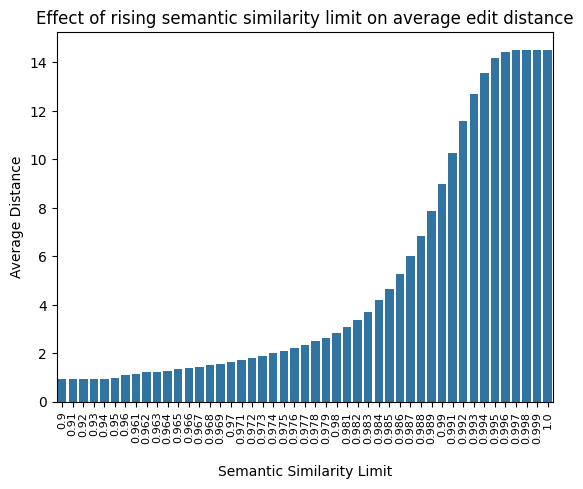

In [156]:
# with open('lim991-999', 'rb') as fp:
#     thedata = pickle.load(fp)
# with open('lim90-1', 'rb') as fp:
#     thedata2 = pickle.load(fp)
# thedata.extend(thedata2)
# print(len(thedata))

with open('48lims', 'rb') as fp:
    thedata = pickle.load(fp)


def extractUnique(tdf):
    # print(df)
    toRet = []
    for i in range(len(tdf)):
        for j in range(i, len(tdf[i])):
            # print(i, j)
            toRet.append(tdf[i][j])
    return toRet


tracker = []
skip1 = True
for k in range(len(thedata)):
    unique = extractUnique(pd.DataFrame(thedata[k][1]))
    # tracker.append((thedata[k][0], min(unique)))
    if thedata[k][0] == .96 and skip1:
        skip1 = False
        continue
    tracker.append((thedata[k][0], sum(unique)/len(unique)))
    # tracker.append((thedata[k][0], max(unique)))
# # print(tracker)
# ordered = []
# ordered.extend(tracker[9:18])
# ordered.extend(tracker[0:9])
# ordered.append(tracker[18])
# # print(ordered)

# print(tracker)
tdf = pd.DataFrame(tracker)
tdf.columns = ["limit", "average distance"]
# print(tdf)

sns.barplot(tdf, x="limit", y ="average distance", err_kws={"linewidth":.5})
plt.xlabel("\nSemantic Similarity Limit")
plt.ylabel("Average Distance")
plt.xticks(fontsize=8, rotation=90)
plt.title("Effect of rising semantic similarity limit on average edit distance")    

plt.savefig("img/similaritylimits.pdf", bbox_inches='tight')